In [2]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler


# import hierarchical clustering libraries
from sklearn.model_selection import StratifiedKFold
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.stats import mode

In [3]:
df = pd.read_csv('seeds_dataset.txt', delimiter='\t', header=None)

df[df.columns[-1]] -= 1

X = df.iloc[:, :-1]
y = df.iloc[:,-1]


scaler = StandardScaler()
X = scaler.fit_transform(X)


In [4]:
max_clusters = 50
min_clusters = np.unique(y).shape[0]

k = [str(i) for i in range(min_clusters, max_clusters+1)]


In [5]:
from sklearn.model_selection import StratifiedKFold


tabla = pd.DataFrame(columns=k, data=None, dtype=float)
tabla.columns.name = "Clusters"
tabla.index.name = "CV"

cv_strat = StratifiedKFold(n_splits=10, shuffle=True)

In [6]:
for c in k:
    kmedias = KMeans(n_clusters=int(c), n_init="auto", random_state=0)
    cv = 0
    for train_index, test_index in cv_strat.split(X,y):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]
        labels = kmedias.fit_predict(X_train)
        moda = np.array([mode(y_train[labels==i]) for i in range(int(c))])
        tabla.loc[cv,c] = np.mean(moda[kmedias.predict(X_test)][:,0] == y_test)
        cv +=1


In [7]:
tabla

Clusters,3,4,5,6,7,8,9,10,11,12,...,41,42,43,44,45,46,47,48,49,50
CV,,,,,,,,,,,,,,,,,,,,,
0,0.904762,0.857143,0.809524,0.904762,0.857143,0.904762,0.904762,0.666667,0.857143,0.952381,...,0.809524,0.952381,0.809524,0.952381,0.857143,0.857143,0.857143,0.714286,0.857143,0.952381
1,0.952381,0.952381,0.809524,0.809524,0.904762,0.809524,0.904762,0.952381,0.952381,0.857143,...,0.952381,0.857143,0.904762,0.857143,0.904762,0.904762,0.952381,0.857143,1.000000,0.952381
2,0.904762,0.952381,0.809524,0.904762,0.904762,0.904762,0.857143,0.904762,0.952381,0.857143,...,0.952381,0.904762,0.904762,0.904762,1.000000,0.952381,0.904762,0.952381,0.904762,0.809524
3,0.952381,1.000000,0.952381,0.761905,0.809524,0.952381,0.857143,0.952381,0.809524,0.857143,...,0.857143,0.904762,0.857143,0.904762,0.857143,0.952381,0.904762,0.809524,0.904762,0.904762
4,0.952381,0.904762,0.857143,0.809524,0.904762,0.904762,0.952381,1.000000,0.857143,0.904762,...,0.952381,0.904762,0.904762,0.857143,0.857143,0.857143,1.000000,1.000000,0.904762,0.857143
5,1.000000,0.857143,0.952381,0.809524,1.000000,0.904762,0.761905,0.761905,1.000000,1.000000,...,0.904762,0.857143,0.952381,0.904762,1.000000,0.952381,0.952381,0.952381,1.000000,0.904762
6,0.809524,0.904762,0.904762,0.904762,0.857143,0.904762,0.857143,0.857143,0.952381,0.952381,...,1.000000,0.952381,0.904762,0.809524,0.952381,0.904762,0.857143,0.857143,0.809524,0.857143
7,0.857143,0.904762,0.857143,0.809524,0.904762,0.857143,0.952381,0.904762,0.904762,0.904762,...,0.952381,0.857143,0.857143,0.952381,0.809524,0.857143,0.904762,1.000000,0.904762,0.952381
8,1.000000,0.904762,0.904762,1.000000,0.904762,0.809524,0.809524,0.809524,0.857143,0.857143,...,0.904762,0.904762,0.857143,0.857143,0.904762,0.761905,0.904762,0.857143,0.904762,0.904762


In [8]:
column_means = pd.DataFrame(tabla.mean(axis=0))

print("Tasa de aciertos máxima: ", column_means.max()[0])
print("K óptimo: ", column_means.idxmax()[0])

Tasa de aciertos máxima:  0.9333333333333333
K óptimo:  13


In [9]:
# Aglomerative Accuracy 
y_hc = AgglomerativeClustering(n_clusters=29, metric = 'euclidean', linkage = 'ward').fit_predict(X)

moda_hc = np.array([mode(y[y_hc==i]) for i in range(29)], dtype=int)[:,0]

print("Tasa de Aciertos (Jerárquico K=29): ", np.mean(moda_hc[y_hc] == y))

Tasa de Aciertos (Jerárquico K=29):  0.9333333333333333


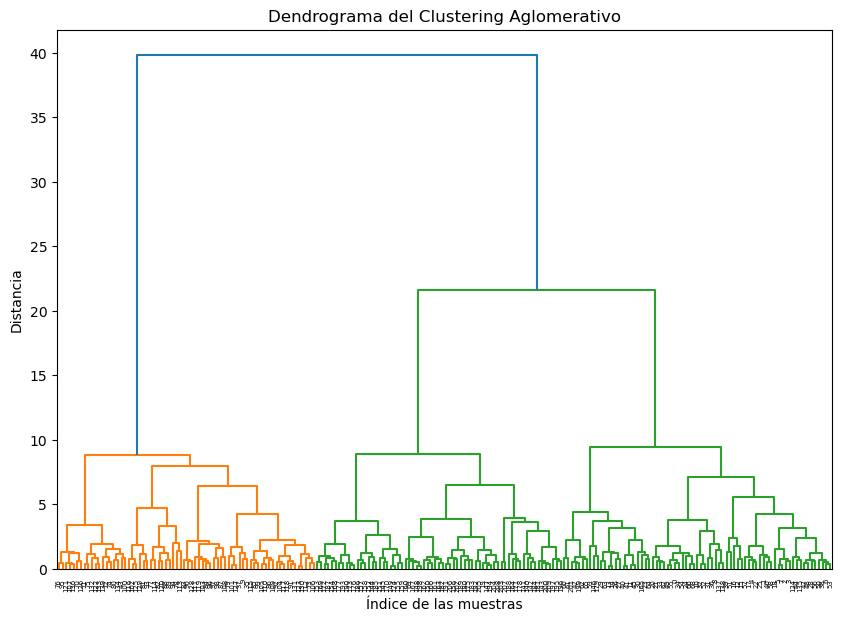

In [10]:
Z = sch.linkage(X, method="ward")
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title('Dendrograma del Clustering Aglomerativo')
plt.xlabel('Índice de las muestras')
plt.ylabel('Distancia')
plt.show()